Dados faltantes:
Entity                                                             0
Year                                                               0
Access to electricity                                             10
Access to clean fuels for cooking                                169
Renewable-electricity-generating-capacity-per-capita             931
Financial flows to developing countries                         2089
Renewable energy share in the total final energy consumption     194
Electricity from fossil fuels                                     21
Electricity from nuclear                                         126
Electricity from renewables                                       21
Low-carbon electricity                                            42
Primary energy consumption per capita                              0
Energy intensity level of primary energy                         207
Value_co2_emissions_kt_by_country                                428
Renewables       

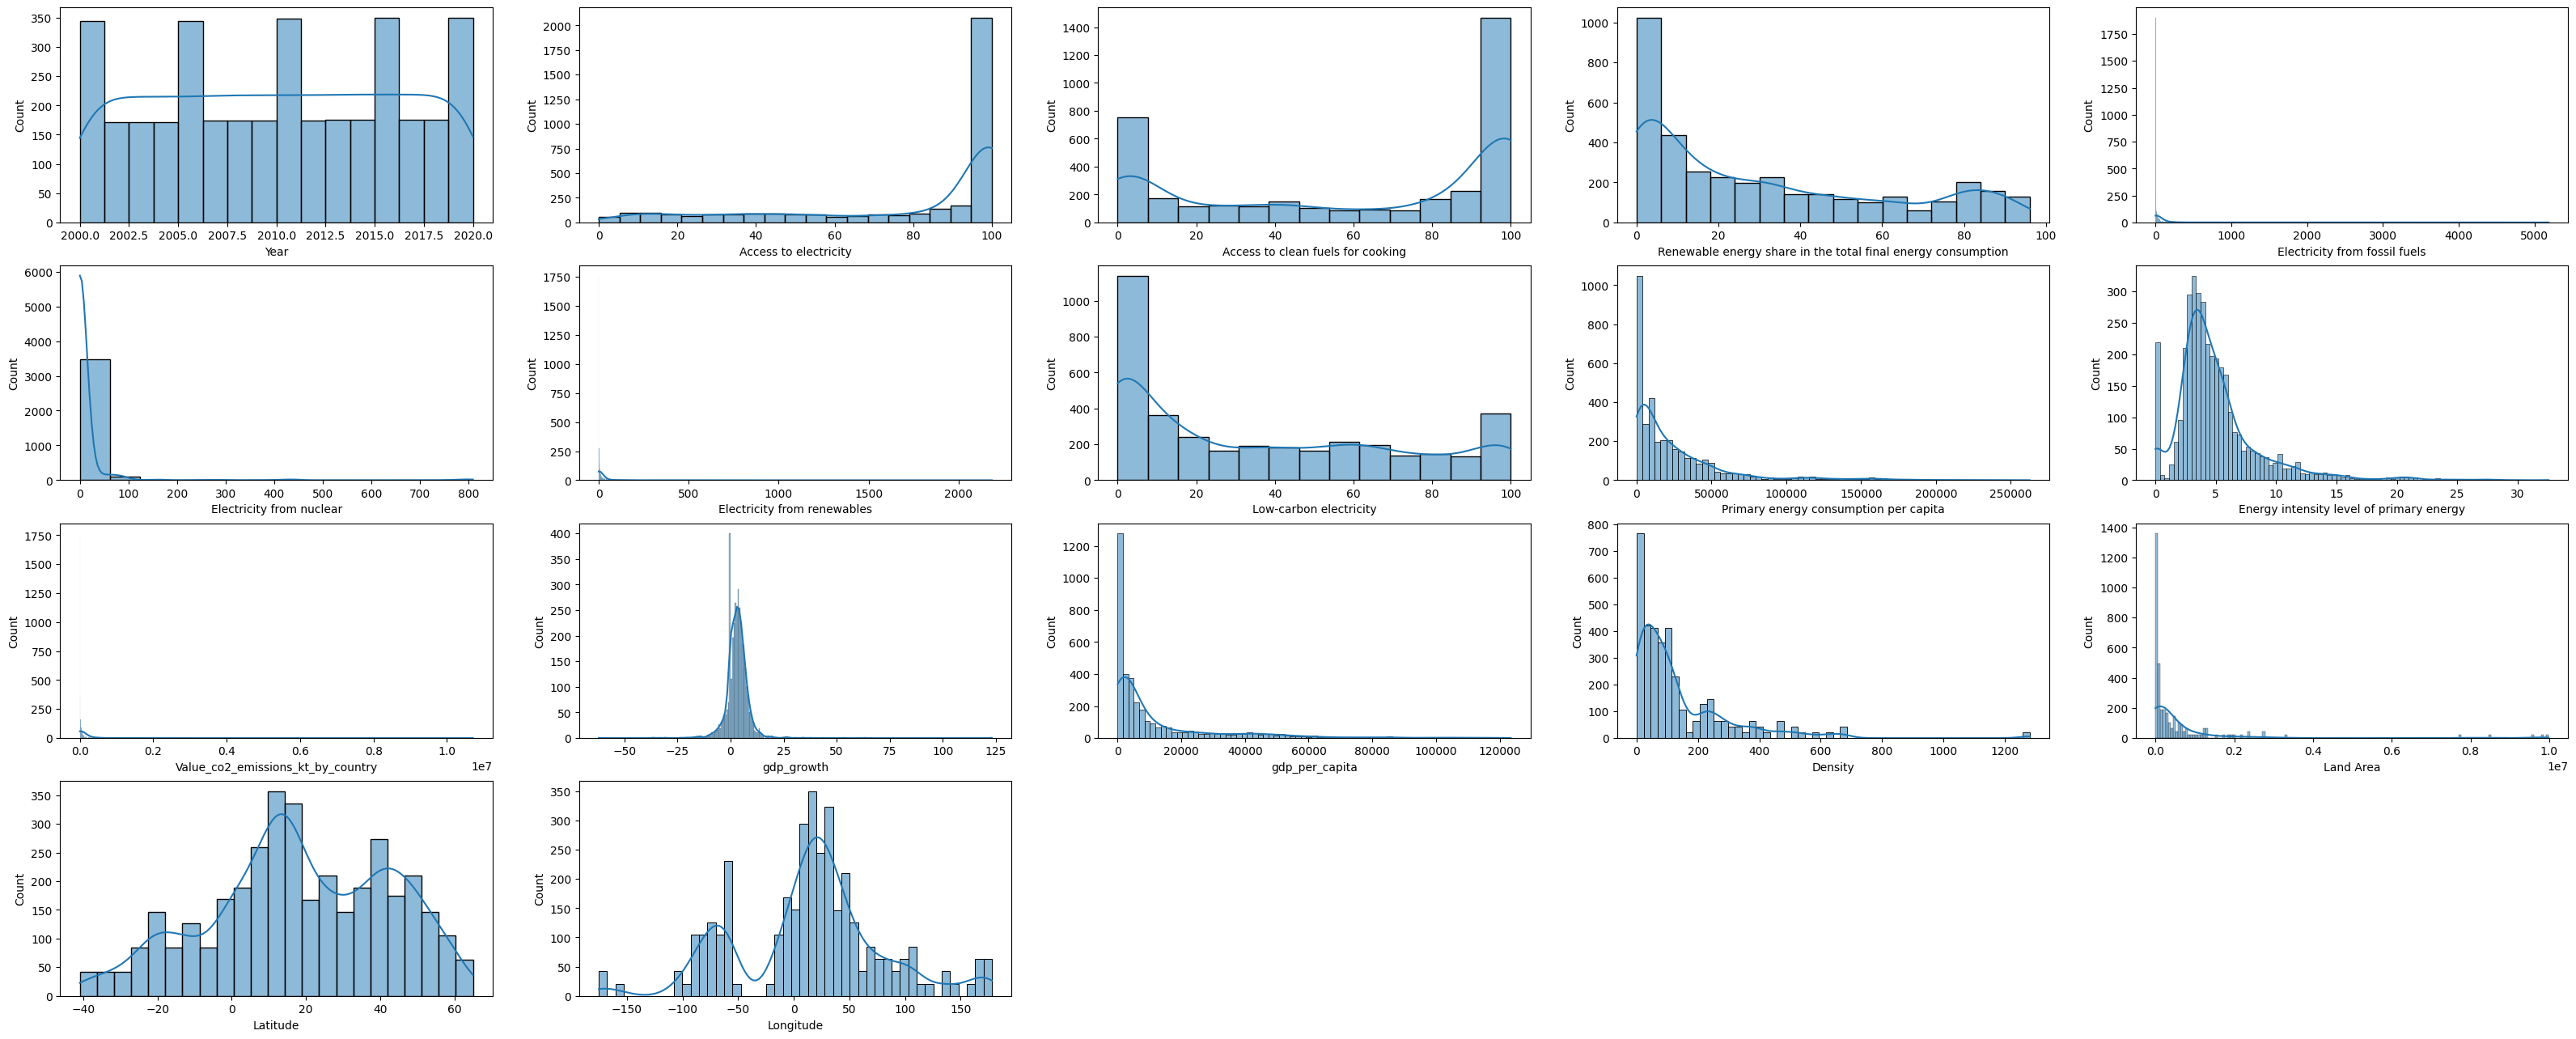

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt 
import seaborn as sns

dataset_original = pd.read_csv('energia_sustentavel.csv', sep=',', decimal='.')

dataset_original['Density'] = pd.to_numeric(dataset_original['Density'], errors='coerce')

lugares = dataset_original['Entity'].copy(deep=True)

#Verificar se tem nulos
print("Dados faltantes:")
print(dataset_original.isna().sum())

#Remover colunas que tem muito dado faltante
dataset_original = dataset_original.drop(['Entity', 'Financial flows to developing countries', 'Renewables','Renewable-electricity-generating-capacity-per-capita' ], axis=1)


dataset_original.fillna(0, inplace=True)

print("Dados duplicados:")
print(dataset_original.duplicated().sum())


plt.figure(figsize=(40, 20))

for index, value in enumerate(dataset_original.columns):
    plt.subplot(5, 5,index+1)
    sns.histplot(dataset_original[value], kde=True)

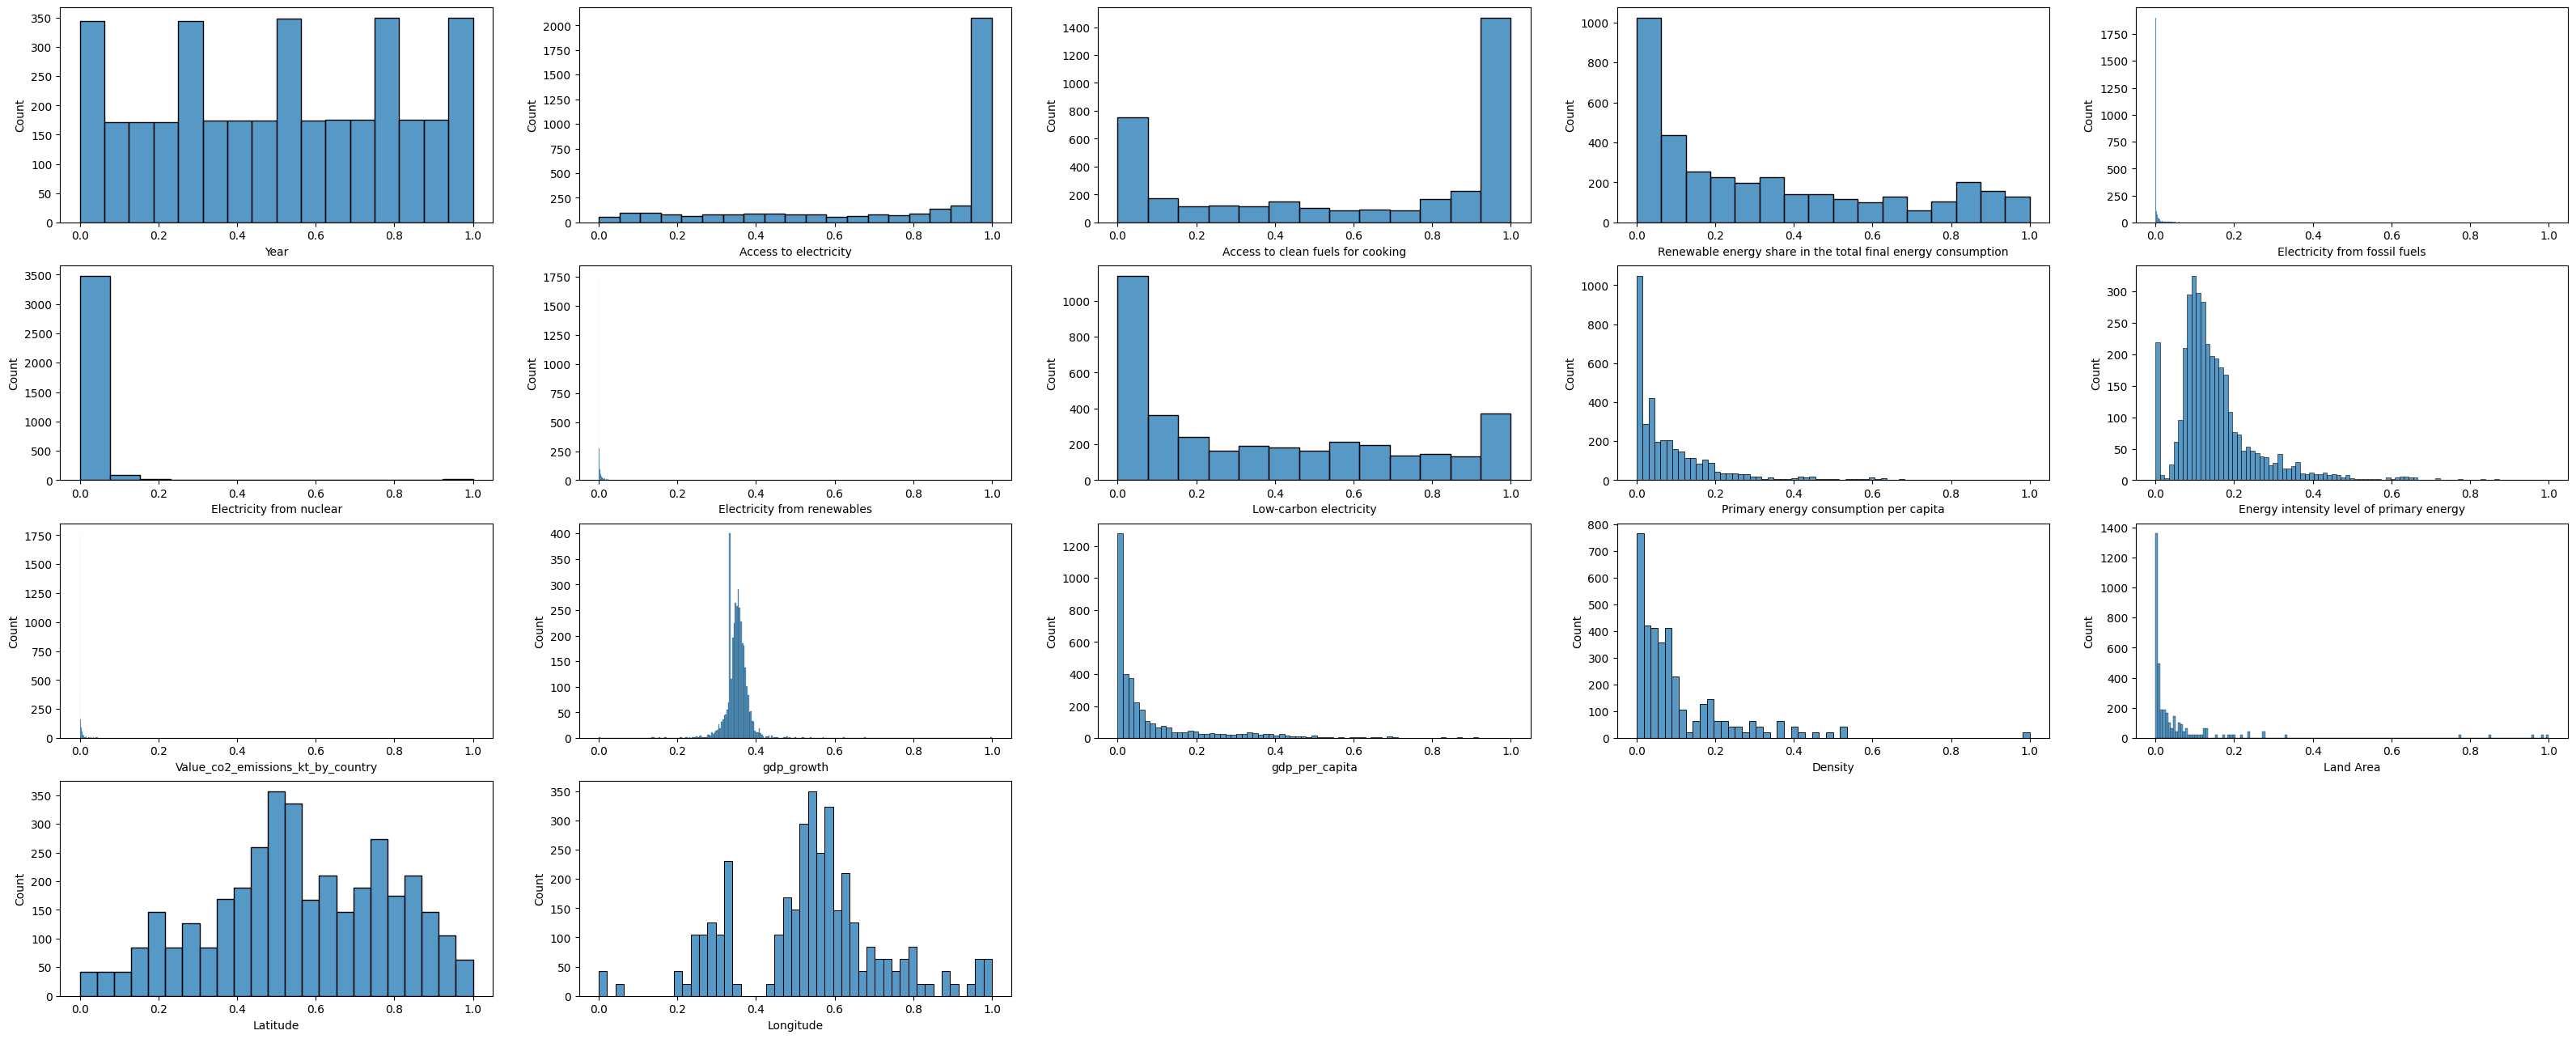

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


scaler = MinMaxScaler()
dataset_normalizado = pd.DataFrame(scaler.fit_transform(dataset_original), columns=dataset_original.columns)
plt.figure(figsize=(40, 20))

for index, value in enumerate(dataset_normalizado.columns):
    plt.subplot(5, 5,index+1)
    sns.histplot(dataset_normalizado[value])
    plt.xlabel(dataset_original.columns[index])

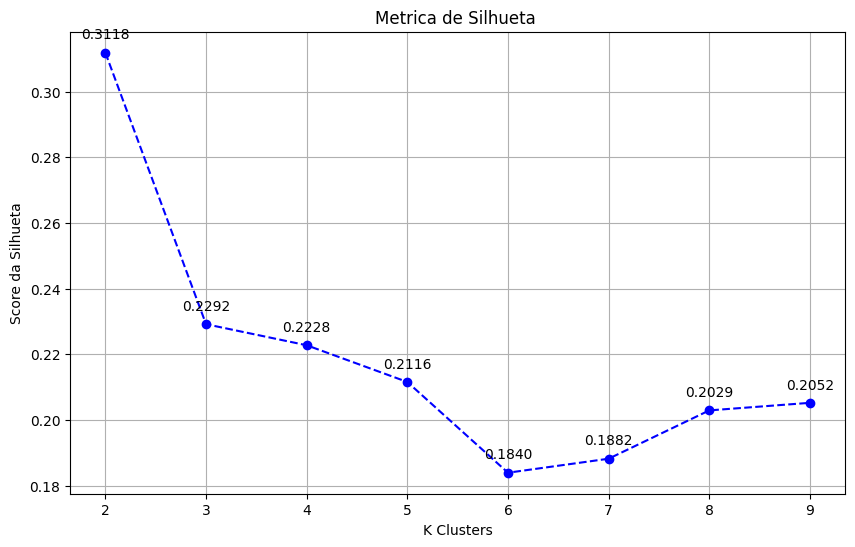

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = range(2, 10)

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=22)
    cluster_labels = kmeans.fit_predict(dataset_normalizado)
    silhouette_avg = silhouette_score(dataset_normalizado, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--', color='b')

for i, txt in enumerate(silhouette_scores): 
    plt.annotate(f'{txt:.4f}', (range_n_clusters[i], silhouette_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Metrica de Silhueta ')
plt.xlabel('K Clusters')
plt.ylabel('Score da Silhueta')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

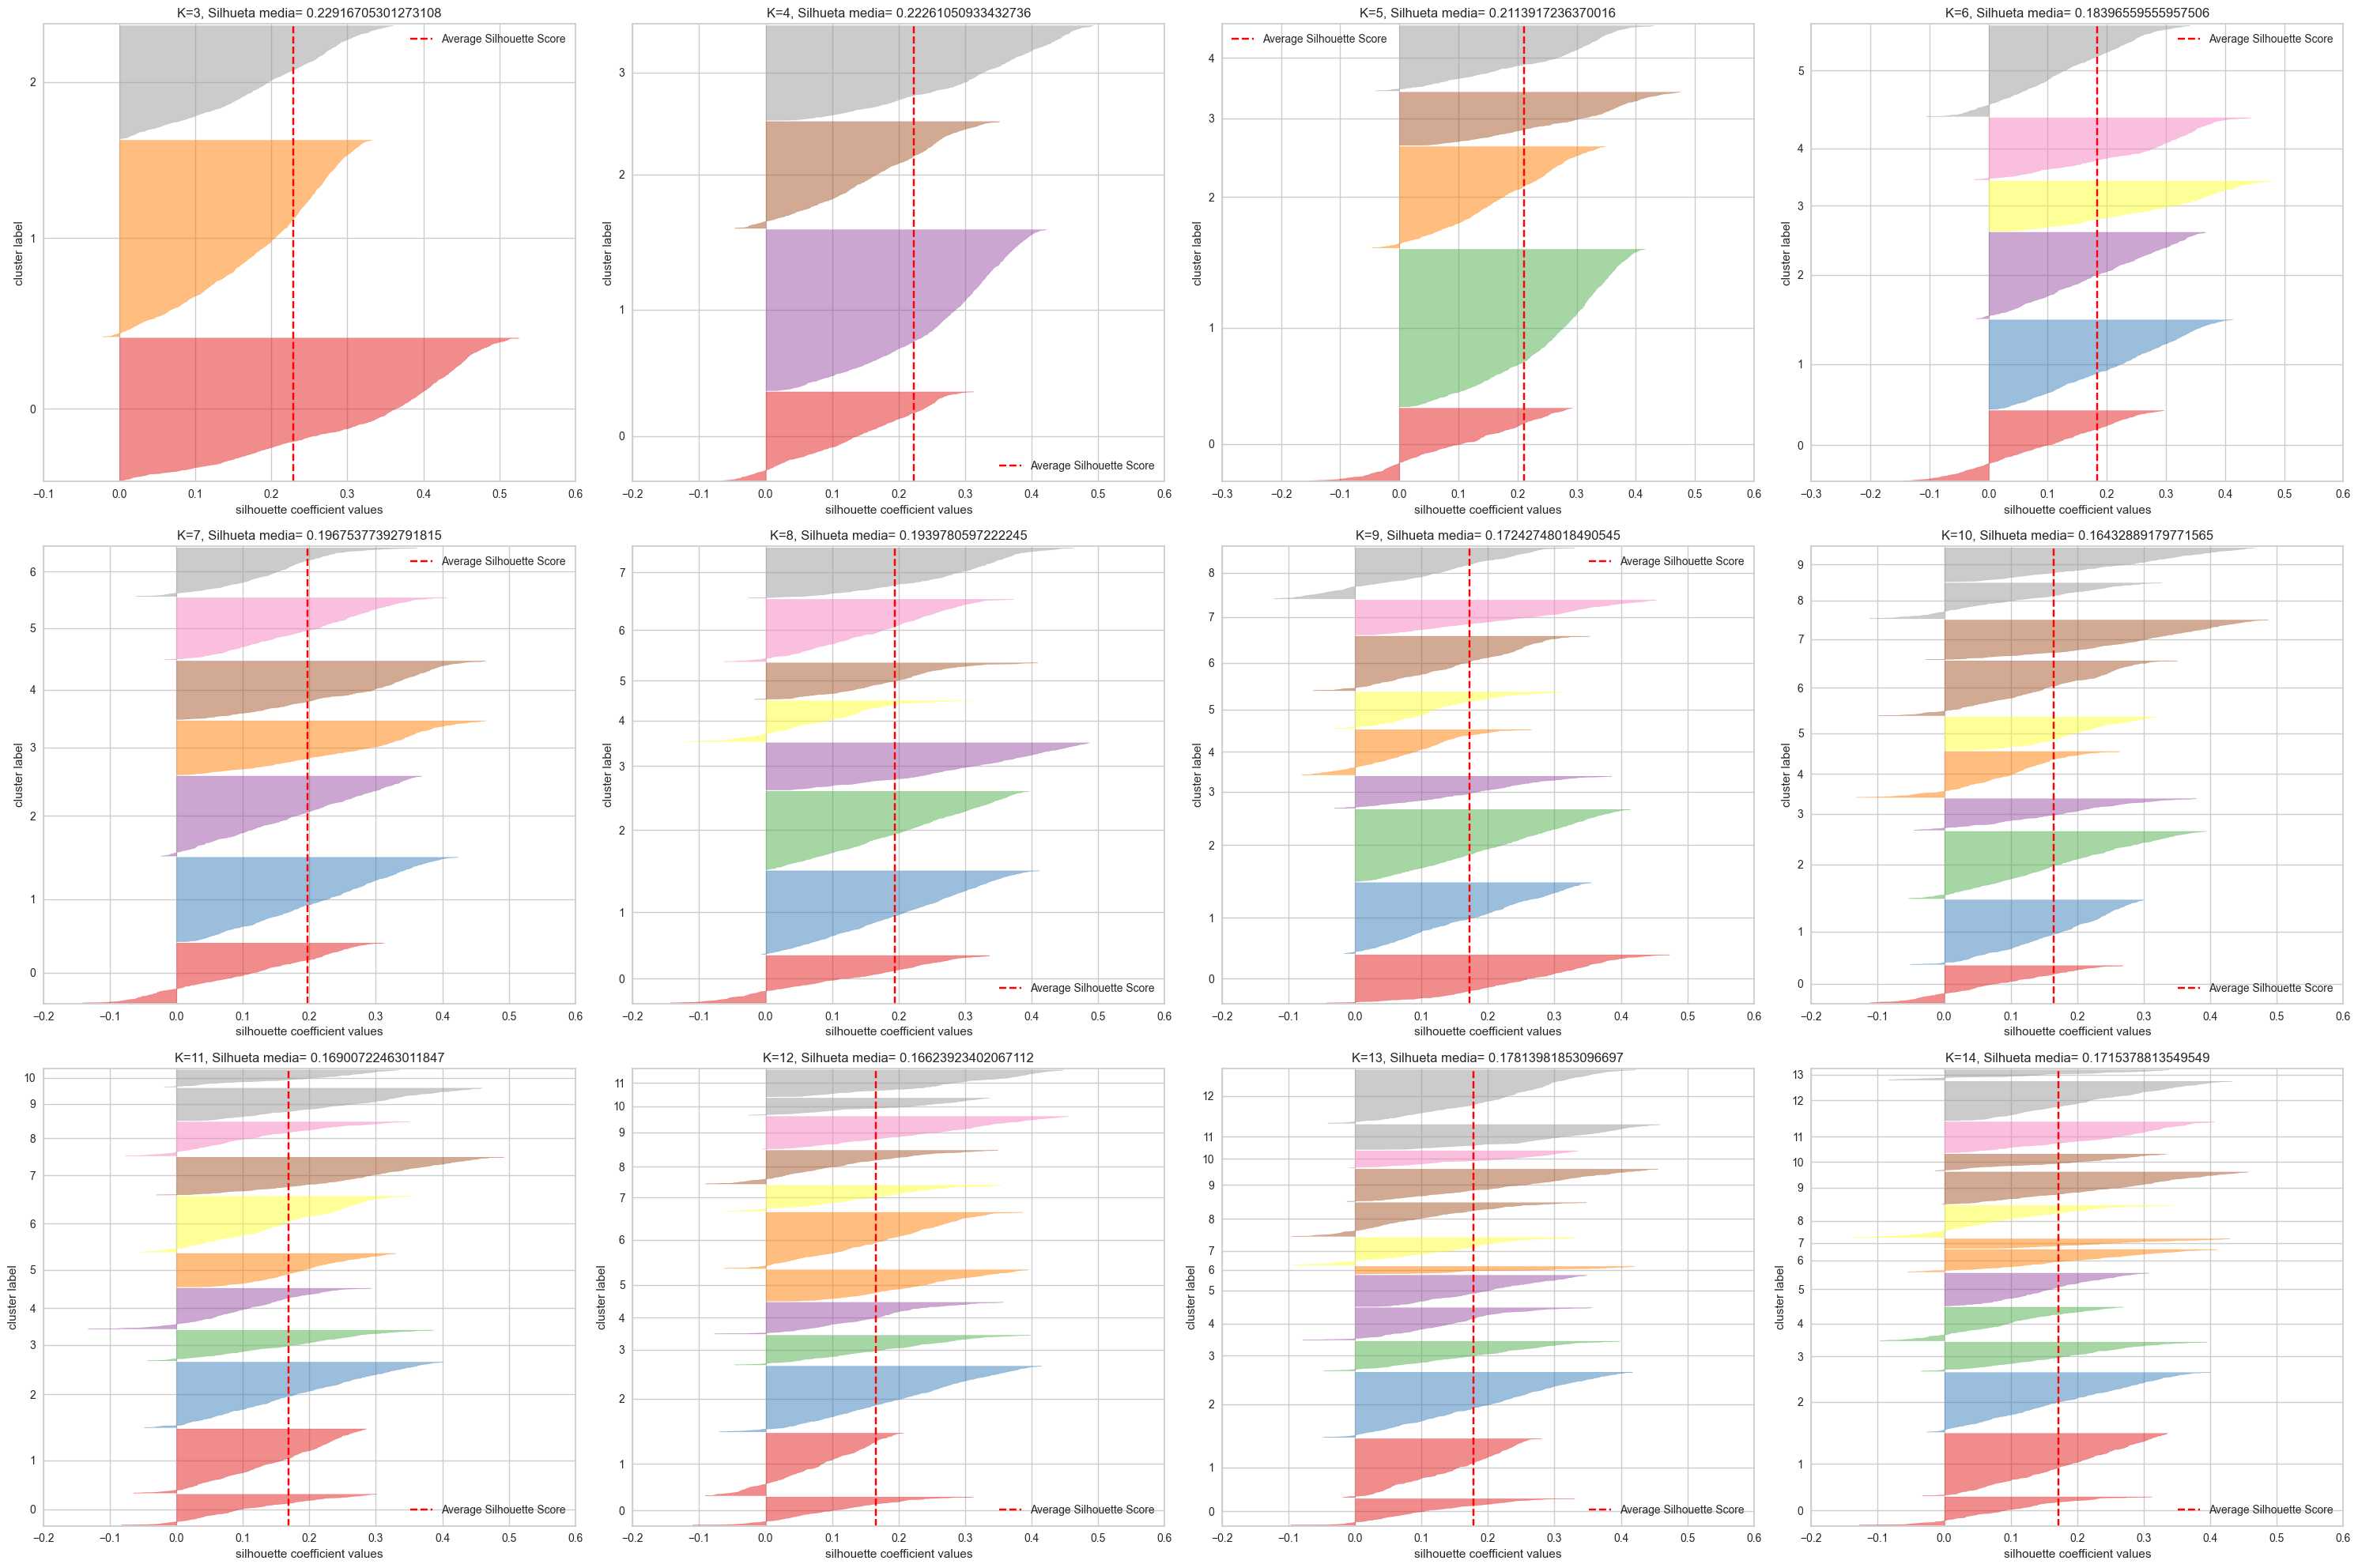

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import metrics

model = KMeans()
fig, axes = plt.subplots(3, 4, figsize=(30, 20))
axes = axes.flatten()
for i, k in enumerate(range(3, 15)):
    model = KMeans(n_clusters=k,random_state=22)
    visualizer = SilhouetteVisualizer(model,ax=axes[i])
    visualizer.fit(dataset_normalizado)   
    visualizer.finalize()  
    silhouette_samples = metrics.silhouette_samples(dataset_normalizado, model.labels_)
    axes[i].set_title(f"K={k}, Silhueta media= {silhouette_samples.mean()}")




plt.tight_layout()
plt.show()

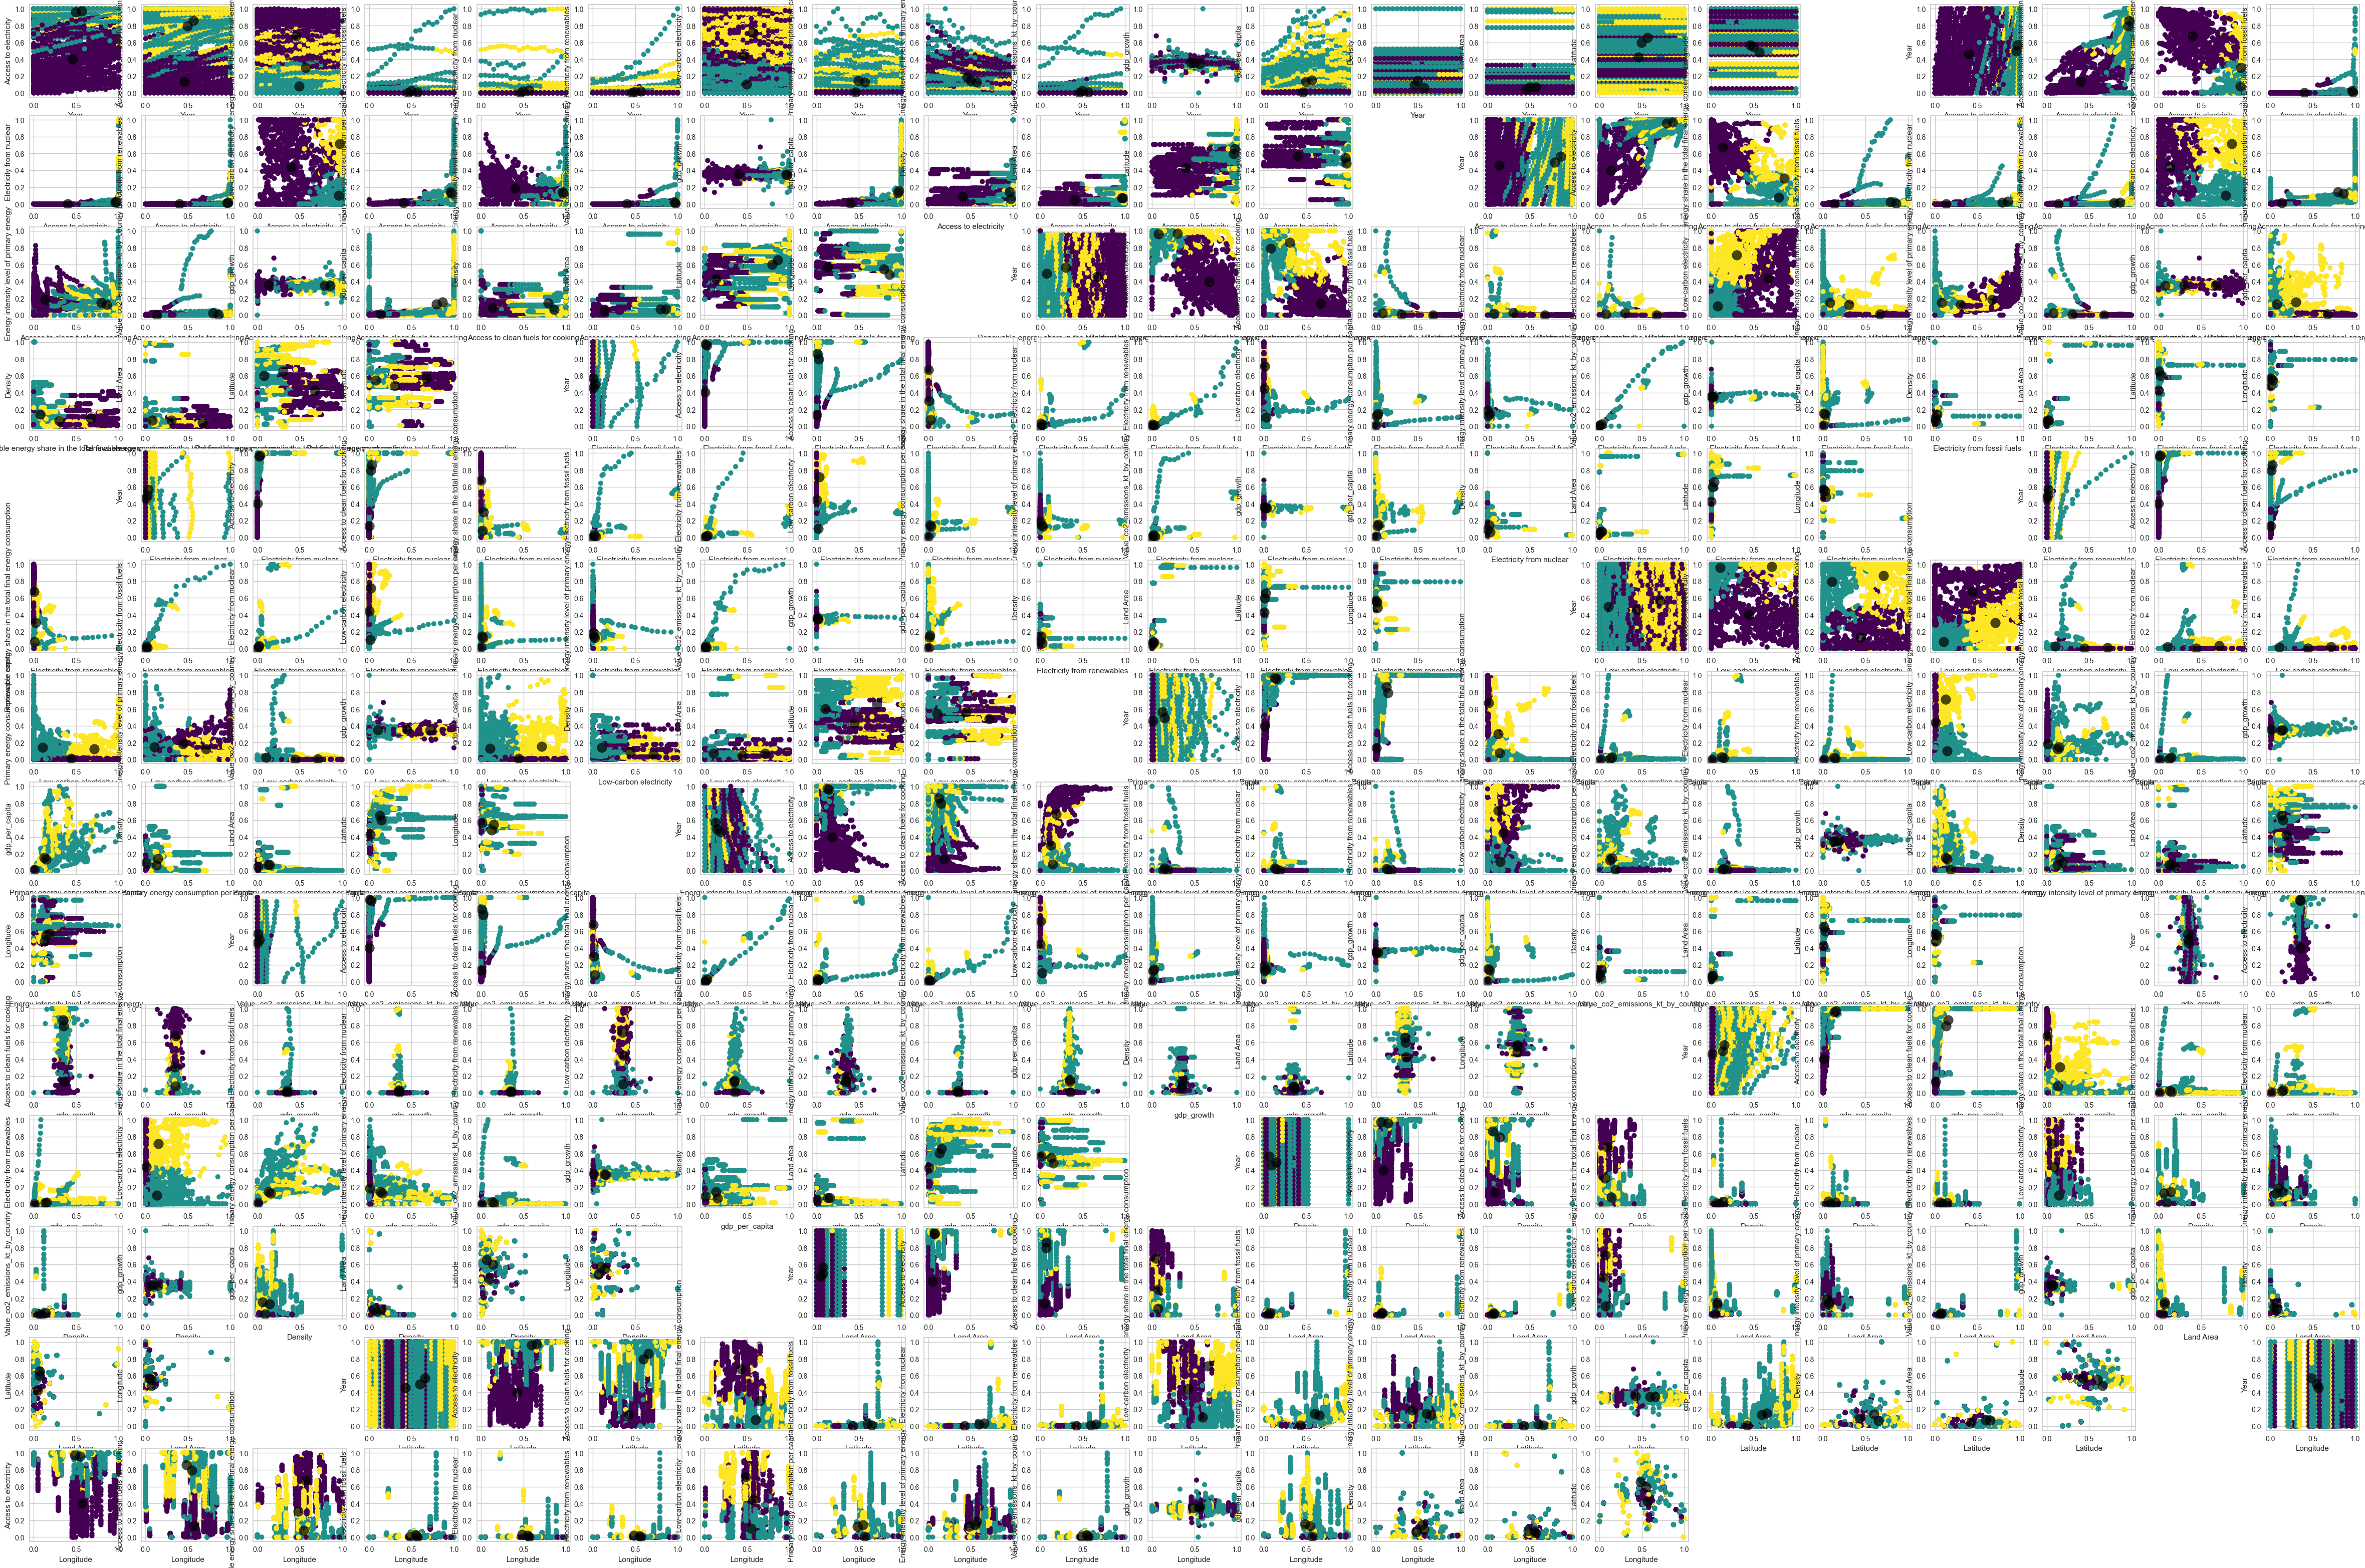

In [32]:

kmeans = KMeans(n_clusters=3,random_state=22)
model= kmeans.fit(dataset_normalizado)
y_kmeans = kmeans.predict(dataset_normalizado)

centers = kmeans.cluster_centers_

plt.figure(figsize=(60, 60))
index=0
for col1 in dataset_normalizado.columns:
    for col2 in dataset_normalizado.columns:
        if col1 != col2:
            index+=1
            plt.subplot(21,21,index)
            plt.scatter(dataset_normalizado[col1], dataset_normalizado[col2], c=y_kmeans, s=50, cmap='viridis')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.scatter(centers[:, dataset_normalizado.columns.get_loc(col1)], centers[:, dataset_normalizado.columns.get_loc(col2)], c='black', s=200, alpha=0.7)
    index+=1

#Fazendo uma analise breve dos plots 2 a 2 podemos ver que os dados estao MUITO aglomerados e sem forma esferica, o que dificulta para utilizar Kmeans